# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

**Решение:**
$$
Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)\Rightarrow\\
Q(w + h) = \dfrac{1}{\ell} \left(y - X(w + h) \right)^T \left(y - X(w + h) \right) =\\
\dfrac{1}{\ell} (y - Xw - Xh)^T (y - Xw - Xh) =\\
\dfrac{1}{\ell} \left((y - Xw)^T(y - Xw - Xh) - h^TX^T(y - Xw - Xh)\right) =\\
\dfrac{1}{\ell} \left((y - Xw)^T(y - Xw) - (y - Xw)^TXh - h^TX^T(y - Xw) + h^TX^TXh\right) =\\
\dfrac{1}{\ell}(y - Xw)^T(y - Xw) - \dfrac{2}{\ell}(y - Xw)^TXh + \dfrac{1}{\ell}h^TX^TXh =\\
Q(w) + d_w(Q(w))[h] + \bar{o}(||h||)\Rightarrow\\
d_w(Q(w))[h] = -\dfrac{2}{\ell}(y - Xw)^TXh = \langle -\dfrac{2}{\ell}X^T(y - Xw), \ h \rangle \Rightarrow\\
\dfrac{\partial Q}{\partial w} = -\dfrac{2}{\ell}X^T(y - Xw)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/95949387/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/95949430/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/95949476/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/95949515/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/95949775/

**Ник в яконтесте: fafatkullin@edu.hse.ru**

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2023-fall/homeworks-practice/homework-practice-03-gd/autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

**Проверим, нет ли незаполненных данных на всякий случай.**

In [9]:
data.isna().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

**Посмотрим на распределение таргета и на его логарифм.**

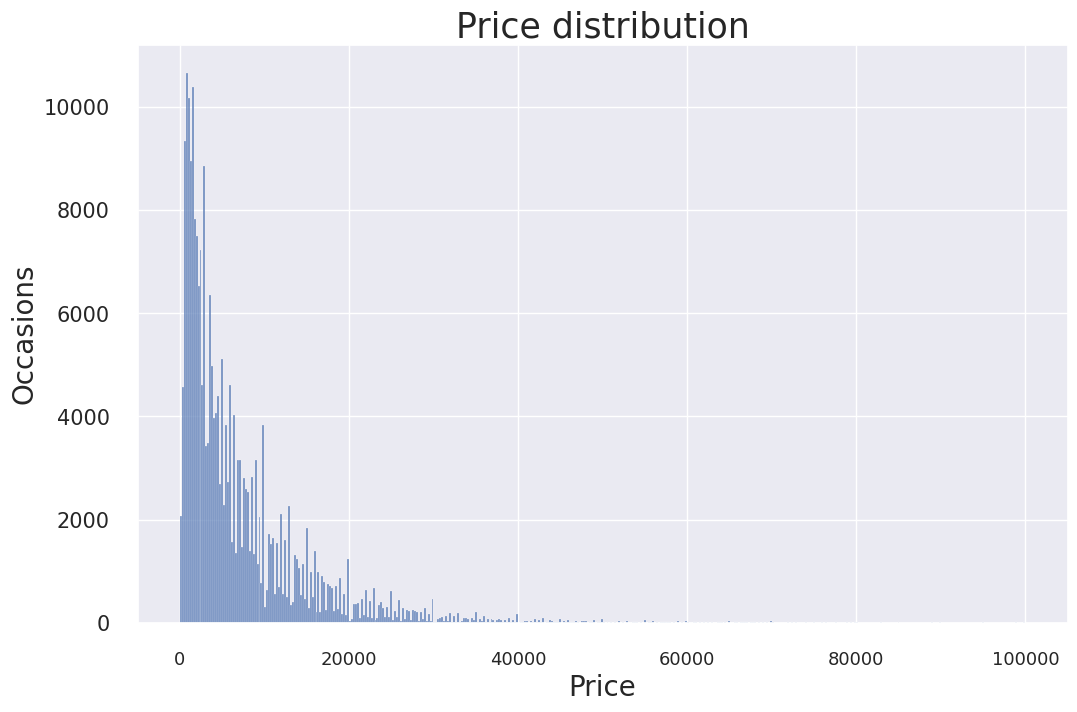

In [10]:
fig = plt.figure(figsize=(12, 7.5))
ax = fig.add_subplot(111)
sns.histplot(data['price'])
ax.set_title("Price distribution", fontsize=25)
ax.set_xlabel("Price", fontsize=20)
ax.set_ylabel("Occasions", fontsize=20)
ax.tick_params(axis='y',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=15
               )
ax.tick_params(axis='x',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=13
               )
plt.show()

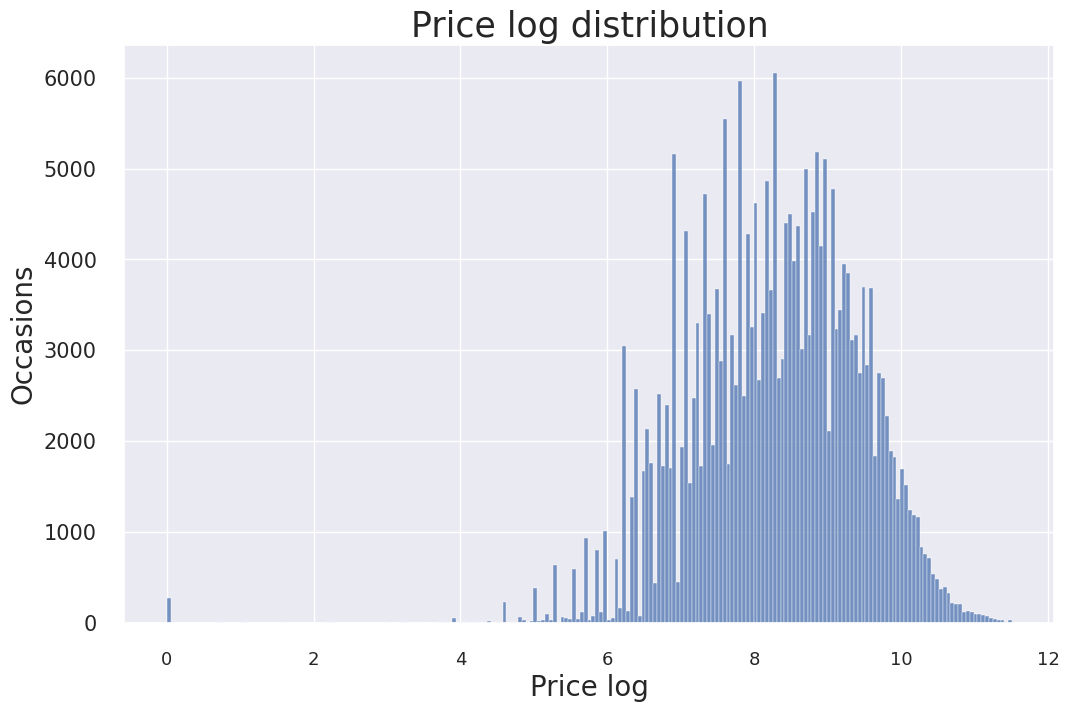

In [11]:
data['log_price'] = np.log(data['price'])
fig = plt.figure(figsize=(12, 7.5))
ax = fig.add_subplot(111)
sns.histplot(data['log_price'])
ax.set_title("Price log distribution", fontsize=25)
ax.set_xlabel("Price log", fontsize=20)
ax.set_ylabel("Occasions", fontsize=20)
ax.tick_params(axis='y',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=15
               )
ax.tick_params(axis='x',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=13
               )
plt.show()

**У нас что то похожее на нормальное распределение у логарифма таргета. Пользуясь логикой, уберем все ценники меньше 400 (едва ли можно купить даже очень подержанный и битый автомобиль за такие деньги).**

In [12]:
data = data[data['price'] > 400]

**Посмотрим на boxplotы категориальных признаков, возможно какие то из них не внесут новой информации для модели.**

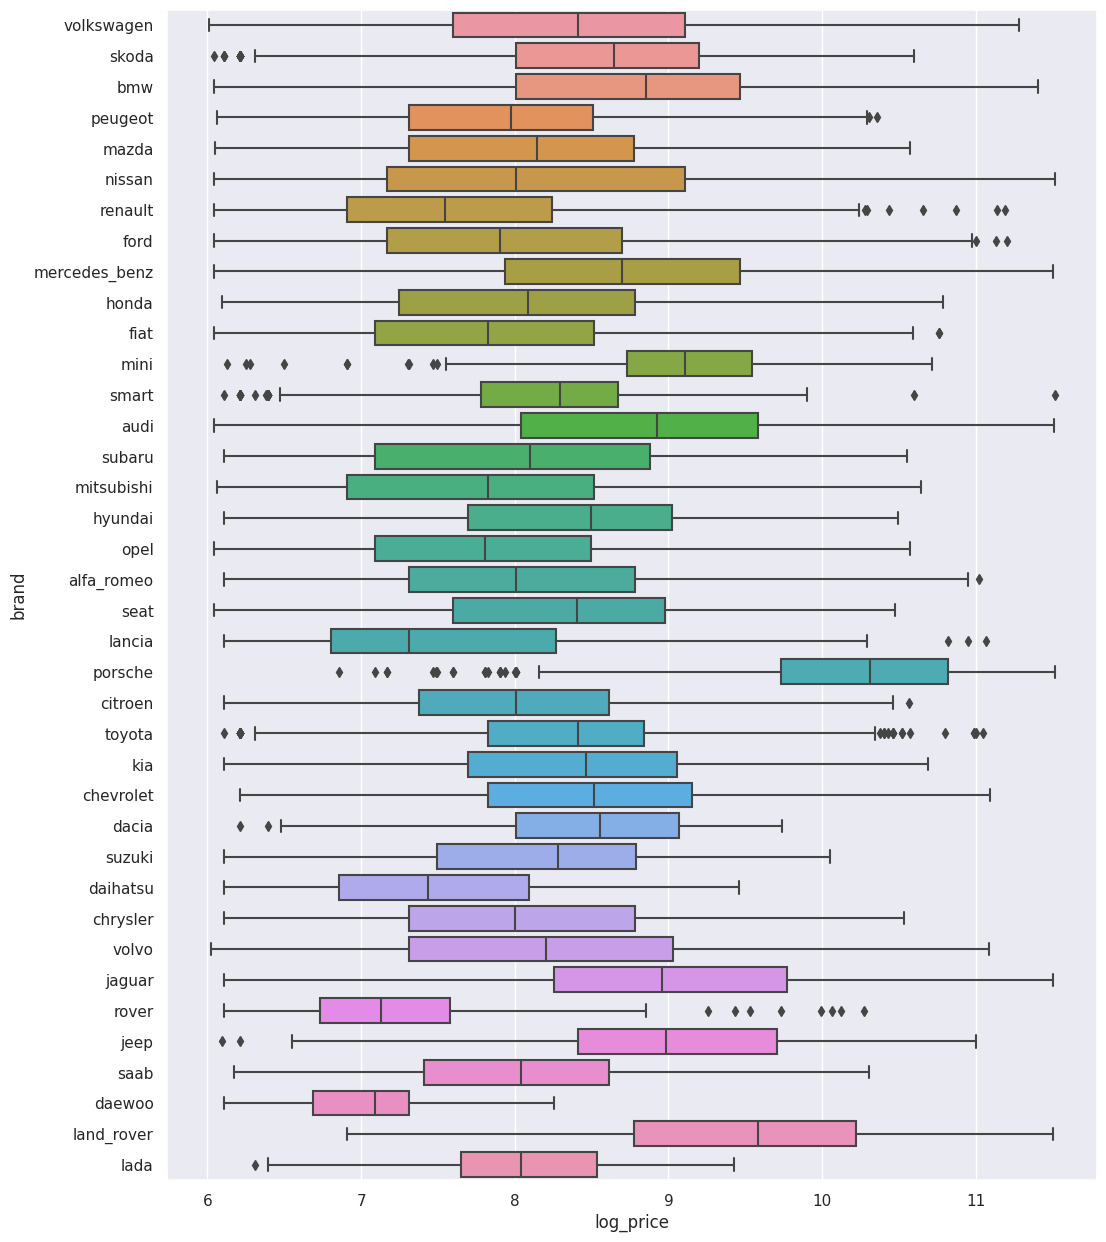

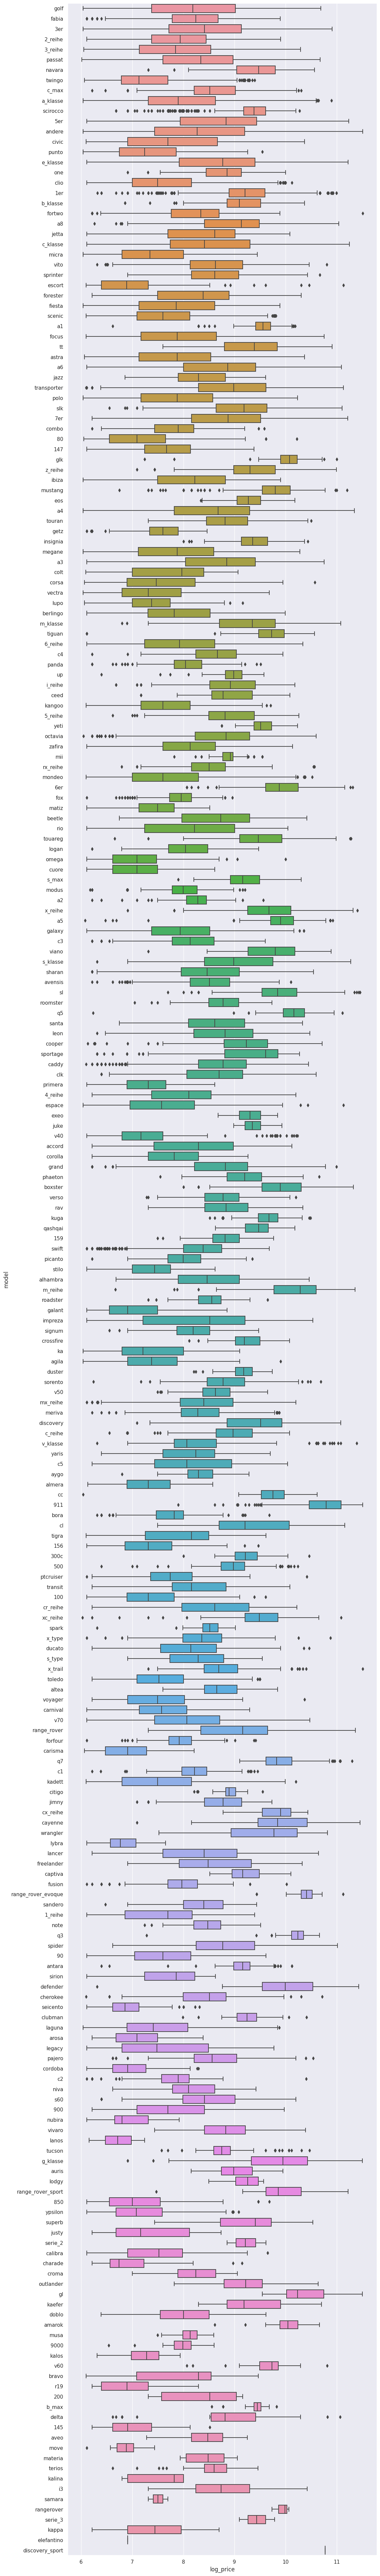

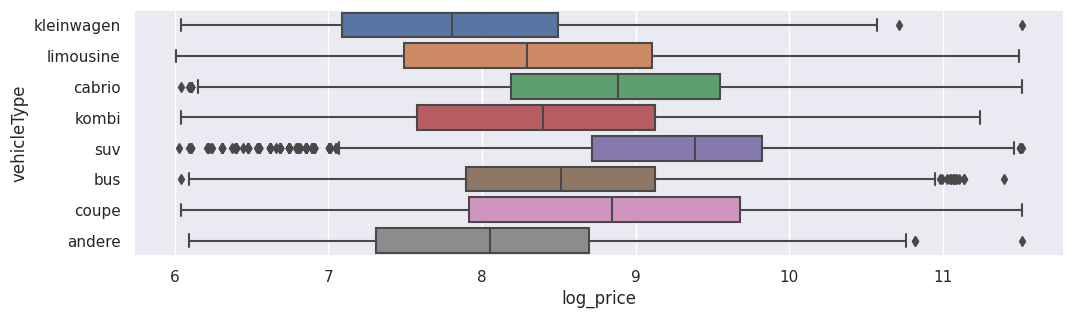

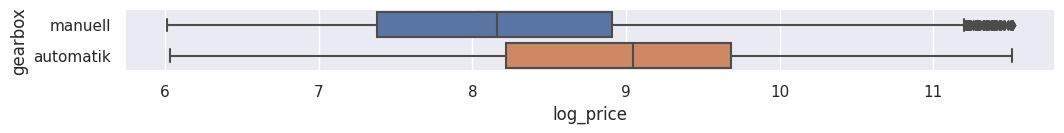

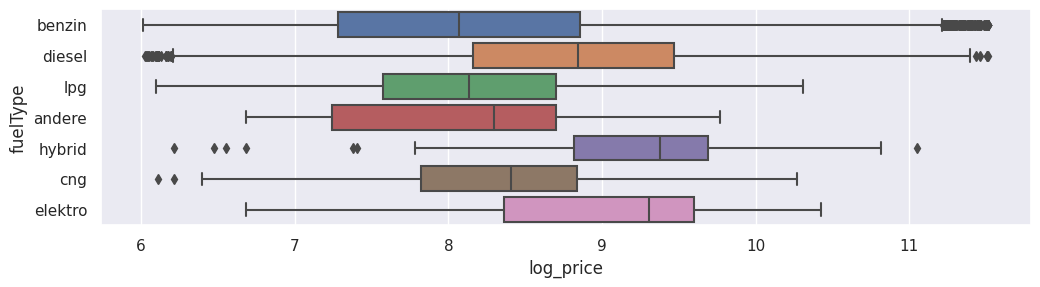

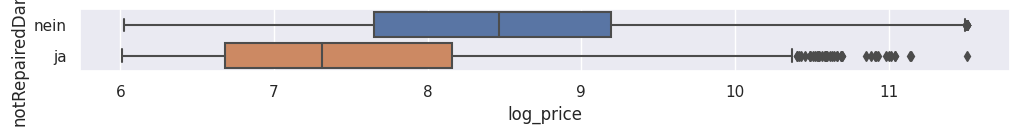

In [13]:
types = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

for typ in types:
    plt.figure(figsize=(12, data[typ].nunique() / 2.5))
    sns.boxplot(data=data, y=typ, x="log_price")
    plt.show()

In [14]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'autoAgeMonths', 'kilometer']
other = []

In [15]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split


x_new, x_test, y_new, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_new, y_new, test_size=0.1/0.9, random_state=42)
print(x_train.shape, x_val.shape, x_test.shape)

(188268, 310) (23534, 310) (23534, 310)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [18]:
from sklearn.metrics import r2_score


loss_hists = {}
best_lambdas = {}
descent_names = ['full', 'stochastic', 'momentum', 'adam']

for descent_name in descent_names:
    print('Trying', descent_name)
    lambdas = np.logspace(-5, 1, 20)
    losses = []

    for lambda_ in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {'dimension': x_val.shape[1],
                      'lambda_': lambda_}
        }

        regression = LinearRegression(
            descent_config=descent_config
        )
        regression.fit(x_train, y_train.to_numpy())

        losses.append(regression.calc_loss(x_val, y_val.to_numpy()))

    best_lambdas[descent_name] = lambdas[np.argmin(losses)]
    print(f'Best lambda: {best_lambdas[descent_name]:.3f}')
    print(f'Loss on validation sample: {np.min(losses):.3f}')

    descent_config = {
        'descent_name': descent_name,
        'kwargs': {'dimension': x_val.shape[1],
                  'lambda_': best_lambdas[descent_name]}
    }
    regression = LinearRegression(
        descent_config=descent_config
    )
    regression.fit(x_train, y_train.to_numpy())

    loss_hists[descent_name] = regression.loss_history
    print(f'Number of iterations to converge: {len(regression.loss_history) - 1}')
    print(f'Loss on train: {regression.calc_loss(x_train, y_train.to_numpy()):.3f}')
    print(f'Loss on test:  {regression.calc_loss(x_test, y_test.to_numpy()):.3f}')
    print(f'R^2 on train: {r2_score(y_train, regression.predict(x_train)):.3f}')
    print(f'R^2 on test:  {r2_score(y_test, regression.predict(x_test)):.3f}\n\n')

Trying full
Best lambda: 1.129
Loss on validation sample: 0.310
Number of iterations to converge: 45
Loss on train: 0.317
Loss on test:  0.311
R^2 on train: 0.714
R^2 on test:  0.720


Trying stochastic
Best lambda: 0.546
Loss on validation sample: 0.323
Number of iterations to converge: 253
Loss on train: 0.309
Loss on test:  0.307
R^2 on train: 0.721
R^2 on test:  0.724


Trying momentum
Best lambda: 0.546
Loss on validation sample: 0.256
Number of iterations to converge: 103
Loss on train: 0.261
Loss on test:  0.256
R^2 on train: 0.764
R^2 on test:  0.769


Trying adam
Best lambda: 2.336
Loss on validation sample: 0.230
Number of iterations to converge: 147
Loss on train: 0.231
Loss on test:  0.230
R^2 on train: 0.791
R^2 on test:  0.793




### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

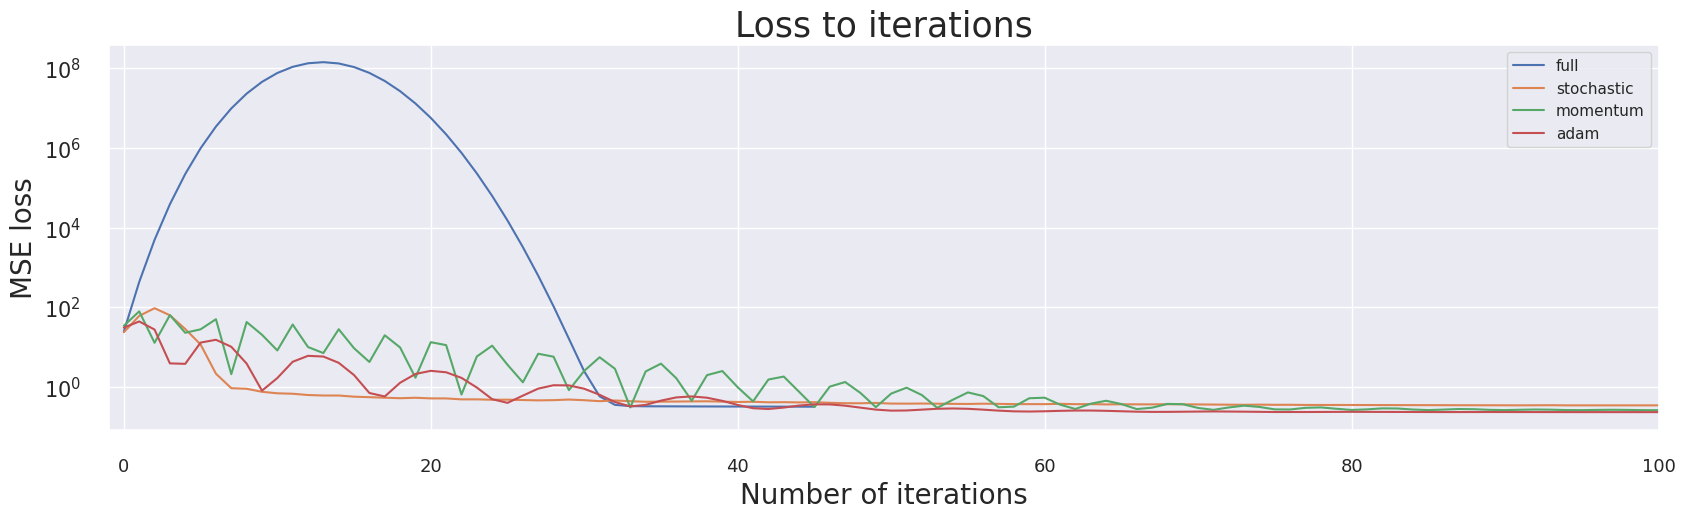

In [19]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
for key in loss_hists.keys():
    plt.plot(loss_hists[key])

ax.set_title("Loss to iterations", fontsize=25)
ax.set_xlabel("Number of iterations", fontsize=20)
ax.set_ylabel("MSE loss", fontsize=20)
ax.tick_params(axis='y',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=15
               )
ax.tick_params(axis='x',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=13
               )
plt.legend(loss_hists.keys())
plt.yscale('log')
plt.xlim(-1, 100)
plt.show()

**Видно логичный результат, что Adam показывает себя лучше всего. Momentum чуть хуже, но учится заметно быстрее (возможно из-за того, что мы храним доп. информацию о направлениях движения). Stochastic судя по графику не успевает доучиться. Full сошелся быстрее всех, но выдал не самый лучший результат по метрикам.**

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [20]:
from time import time


batch_sizes = np.arange(5, 3000, 50)
avg_durations = []
avg_iterations = []

for batch_size in batch_sizes:
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'lambda_': best_lambdas['stochastic'],
            'dimension': x_train.shape[1],
            'batch_size': batch_size
        }
    }

    avg_duration = 0
    avg_iter = 0

    for i in range(10):
        regression = LinearRegression(
            descent_config=descent_config,
        )

        start = time()
        regression.fit(x_train, y_train.to_numpy())
        duration = time() - start

        avg_duration += duration
        avg_iter += len(regression.loss_history) - 1

    avg_durations.append(avg_duration / 10)
    avg_iterations.append(avg_iter / 10)

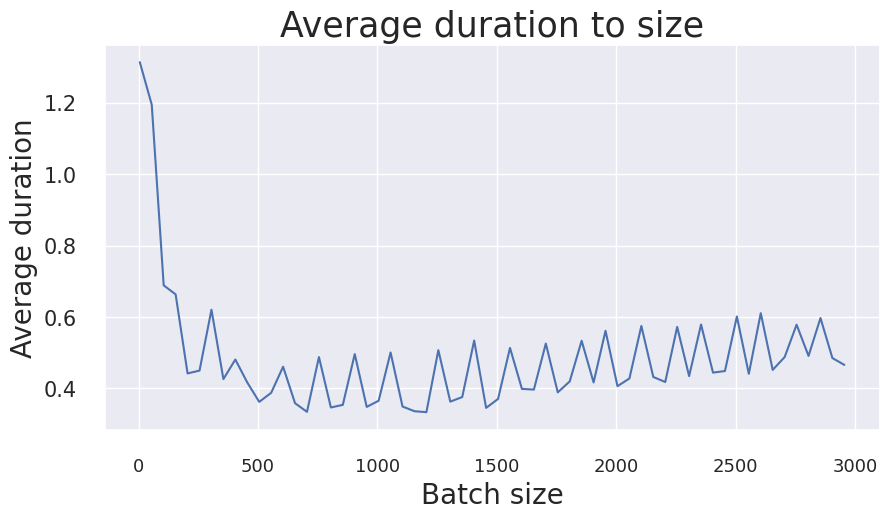

In [21]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
sns.lineplot(x=batch_sizes, y=avg_durations);
ax.set_title("Average duration to size", fontsize=25)
ax.set_xlabel("Batch size", fontsize=20)
ax.set_ylabel("Average duration", fontsize=20)
ax.tick_params(axis='y',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=15
               )
ax.tick_params(axis='x',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=13
               )
plt.show()

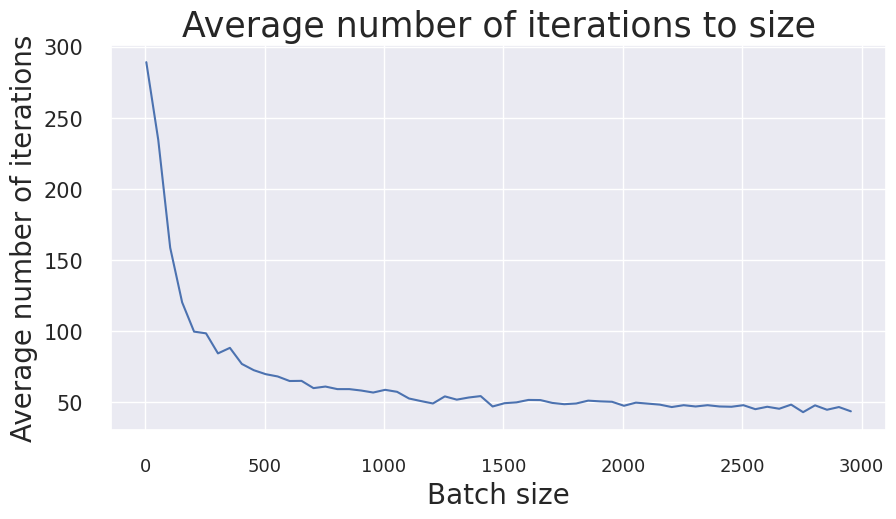

In [22]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
sns.lineplot(x=batch_sizes, y=avg_iterations);
ax.set_title("Average number of iterations to size", fontsize=25)
ax.set_xlabel("Batch size", fontsize=20)
ax.set_ylabel("Average number of iterations", fontsize=20)
ax.tick_params(axis='y',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=15
               )
ax.tick_params(axis='x',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=13
               )
plt.show()

**Если мы увеличиваем размер батча, то до какого то момента у нас очень хорошо увеличивается скорость сходимости, потому что двигаемся почти по антиградиентам. Если батч маленький, то мы двигаемся почти беспорядочно из-за чего скорость сходимости низкая. Если же батч слишком большой, то как видно из графиков мы не получаем буста по скорости сходимости, зато все операции больше времени тратят (в силу арифметики и сложности операций с батчем).**

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

**Так как мы хотим считать градиент, найдем его от новой компоненты функции потерь:**
$$
\dfrac{\partial \left(\dfrac{\mu}{2} \| w \|^2\right)}{\partial w} = \dfrac{\mu}{2}2w = \mu w
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96328163/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [23]:
descent_names = ['full', 'stochastic', 'momentum', 'adam']
reg_loss_hists = {}
best_reg_lambdas = {}
best_mus = {}

for descent_name in descent_names:
    print('Try regularized', descent_name)
    lambdas = np.logspace(-5, 1, 20)
    mus = np.logspace(-5, 0, 6)
    losses = []

    for lambda_ in lambdas:
        for mu in mus:
            descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': {
                    'dimension': x_train.shape[1],
                    'lambda_': lambda_,
                    'mu': mu
                }
            }

            regression = LinearRegression(
                descent_config=descent_config
            )
            regression.fit(x_train, y_train.to_numpy())

            losses.append(regression.calc_loss(x_val, y_val.to_numpy()))

    best_reg_lambdas[descent_name] = lambdas[np.argmin(losses) // len(mus)]
    print(f'Best lambda: {best_reg_lambdas[descent_name]:.3f}')
    best_mus[descent_name] = mus[np.argmin(losses) % len(mus)]
    print(f'Best mu: {best_mus[descent_name]:.3f}')
    print(f'Loss on validation: {np.min(losses):.3f}')

    descent_config = {
        'descent_name': descent_name,
        'regularized': True,
        'kwargs': {
            'dimension': x_train.shape[1],
            'lambda_': best_reg_lambdas[descent_name],
            'mu': best_mus[descent_name]
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )
    regression.fit(x_train, y_train.to_numpy())

    reg_loss_hists[descent_name] = regression.loss_history

    print(f'Number of iterations: {len(regression.loss_history) - 1}')
    print(f'Loss on train: {regression.calc_loss(x_train, y_train.to_numpy()):.3f}')
    print(f'Loss on test: {regression.calc_loss(x_test, y_test.to_numpy()):.3f}')
    print(f'R^2 on train: {r2_score(y_train, regression.predict(x_train)):.3f}')
    print(f'R^2 on test: {r2_score(y_test, regression.predict(x_test)):.3f}\n\n')

Try regularized full
Best lambda: 2.336
Best mu: 0.010
Loss on validation: 0.264
Number of iterations: 271
Loss on train: 0.269
Loss on test: 0.264
R^2 on train: 0.757
R^2 on test: 0.762


Try regularized stochastic
Best lambda: 0.546
Best mu: 0.000
Loss on validation: 0.306
Number of iterations: 204
Loss on train: 0.316
Loss on test: 0.309
R^2 on train: 0.715
R^2 on test: 0.722


Try regularized momentum
Best lambda: 2.336
Best mu: 0.001
Loss on validation: 0.234
Number of iterations: 268
Loss on train: 0.237
Loss on test: 0.236
R^2 on train: 0.786
R^2 on test: 0.788


Try regularized adam
Best lambda: 10.000
Best mu: 0.000
Loss on validation: 0.229
Number of iterations: 168
Loss on train: 0.231
Loss on test: 0.230
R^2 on train: 0.791
R^2 on test: 0.793




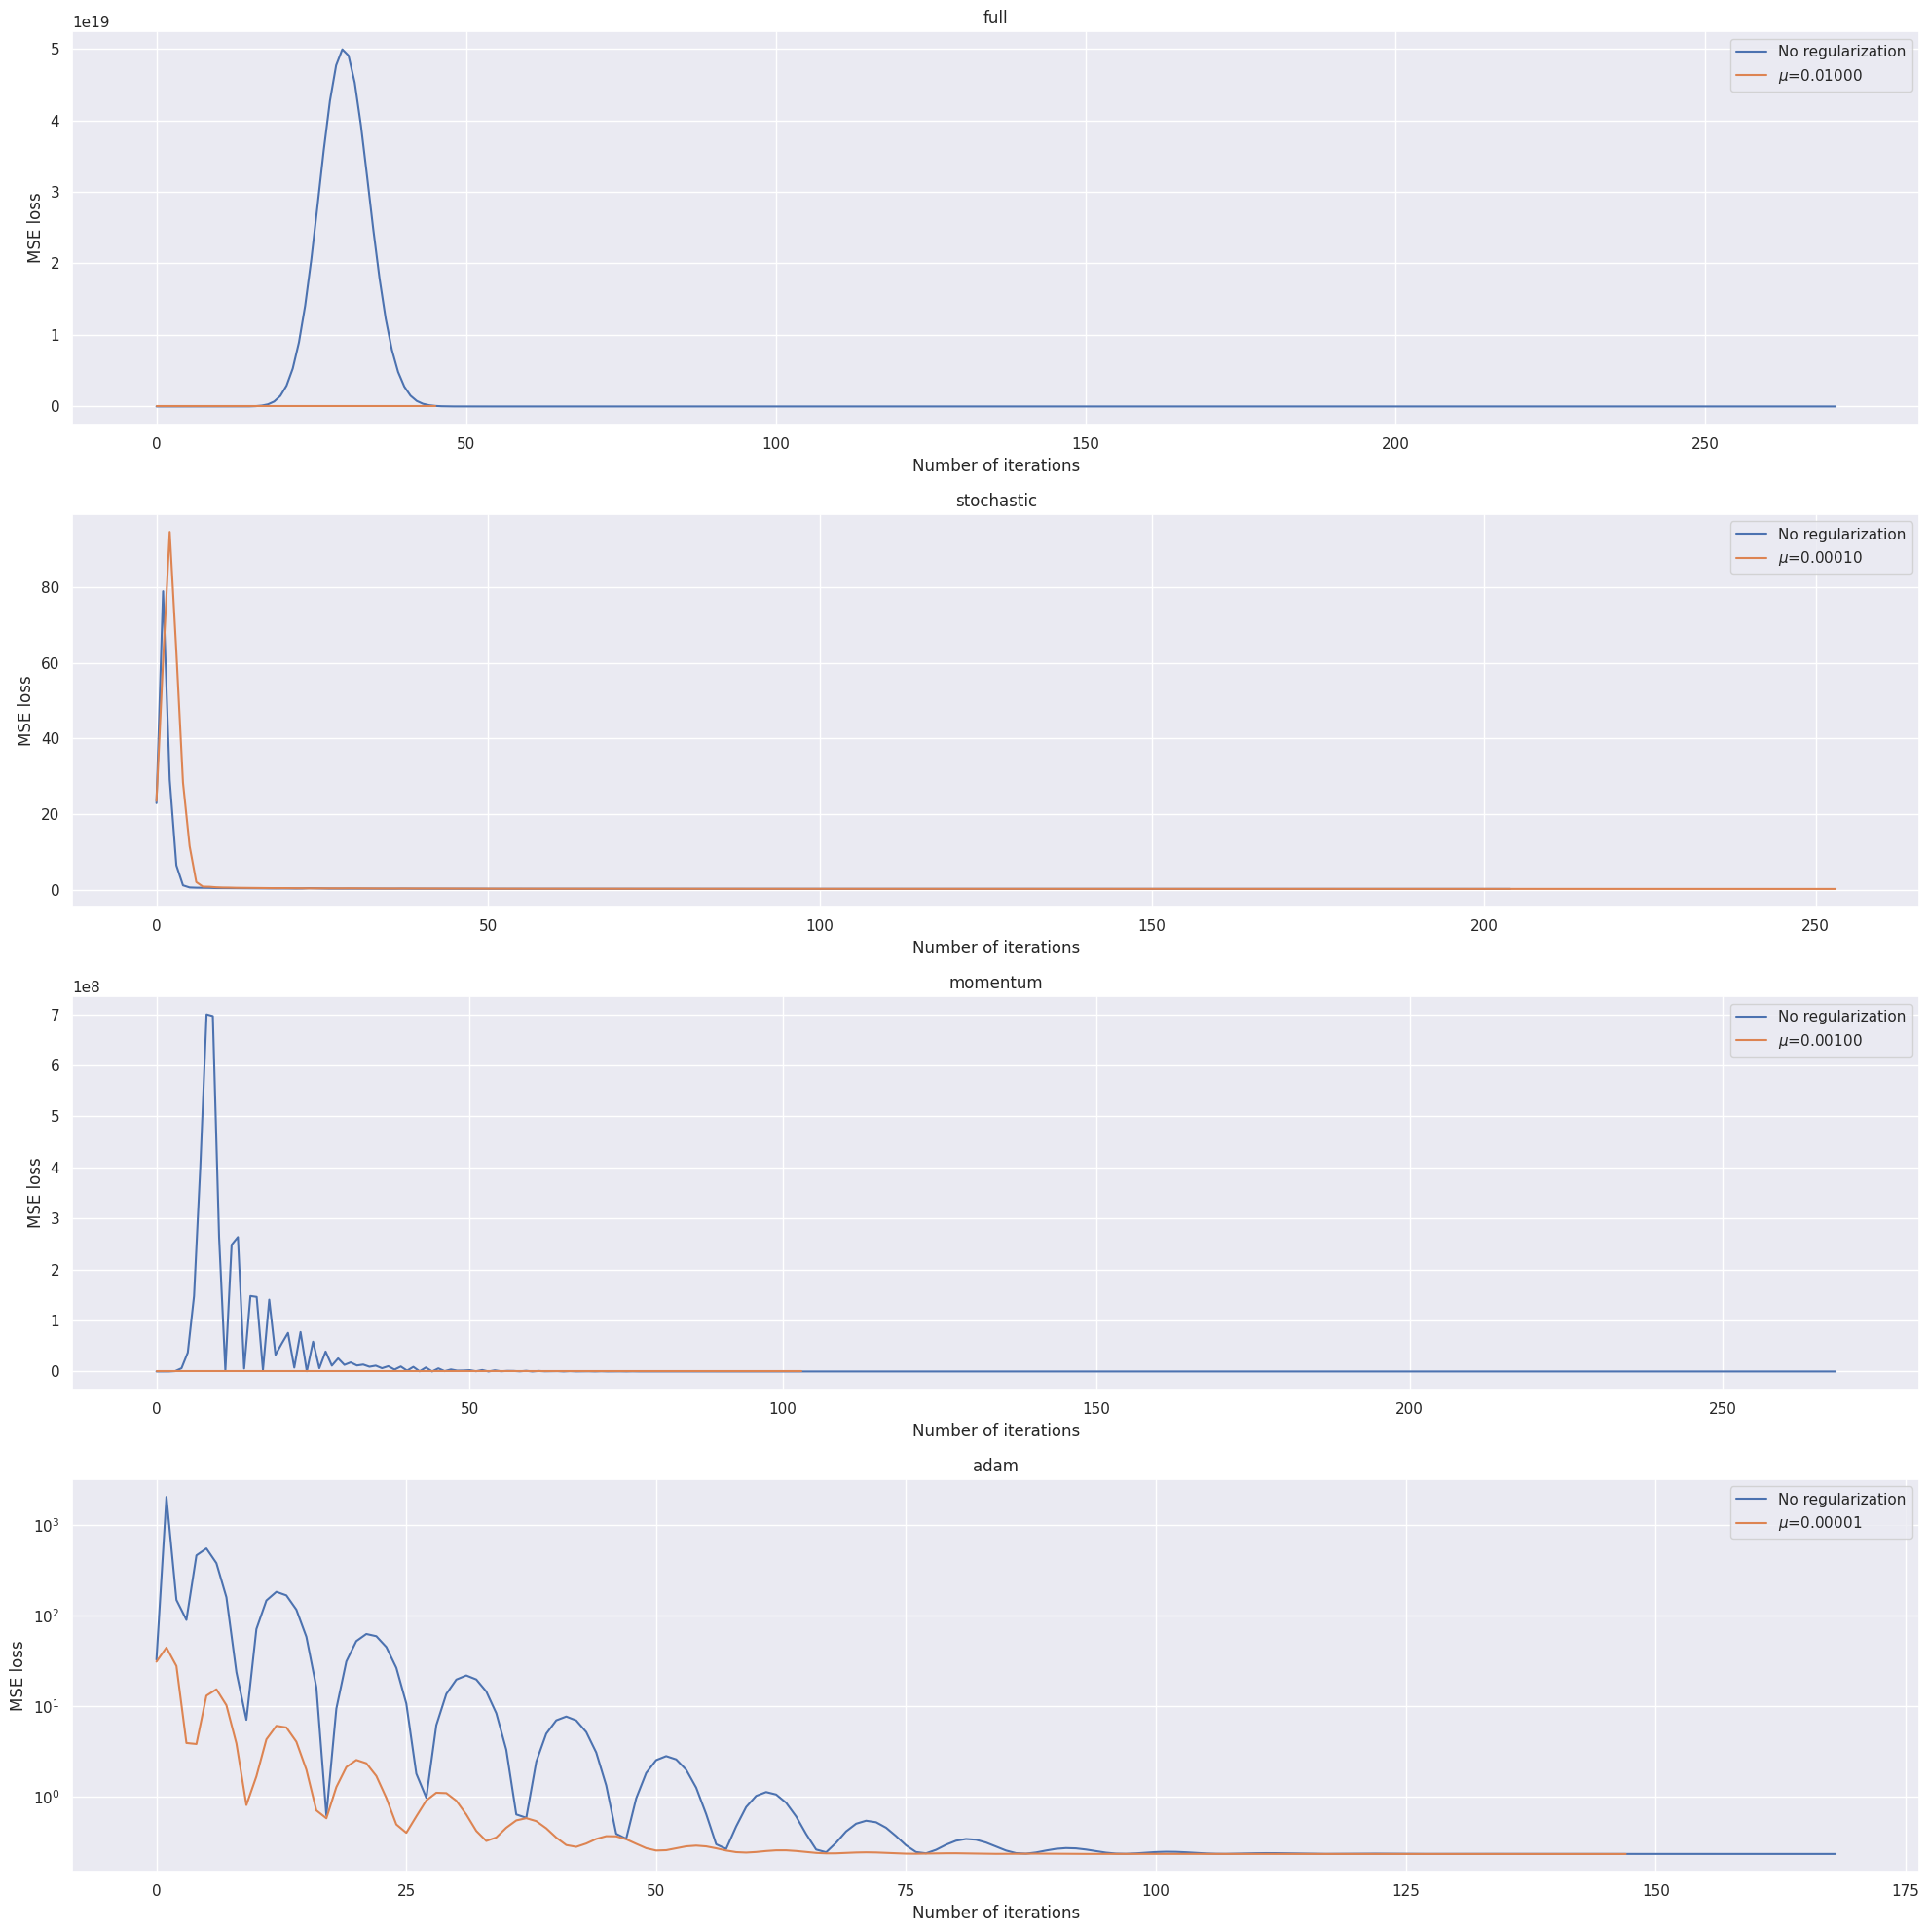

In [24]:
fig, axes = plt.subplots(4, 1, figsize=(20, 20))

it = 0
for descent_name in descent_names:
    axes[it].plot(reg_loss_hists[descent_name])
    axes[it].plot(loss_hists[descent_name])
    axes[it].legend(['No regularization', f'$\mu$={best_mus[descent_name]:.5f}'])
    plt.setp(axes[it], xlabel='Number of iterations', ylabel='MSE loss', title=descent_name)
    it += 1

plt.yscale('log')
plt.tight_layout()
plt.show()

**Регуляризация хорошо повлияла на качество модели на обучении и тестовой выборке (сравнивая MSE из текстового вывода). При этом увеличилось количество итераций до сходимости.**

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:
$$
Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} log(cosh(a_w(x_i) - y_i))
$$
**В матричной форме получаем:**
$$
\dfrac{\partial Q}{\partial w} = \dfrac{1}{\ell}X^Ttanh(Xw - y)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [25]:
from descents import LossFunction
from linear_regression import LinearRegression

logcosh_loss_hists = {}
best_logcosh_lambdas = {}
descent_names = ['full', 'stochastic', 'momentum', 'adam']

for descent_name in descent_names:
    print('Trying', descent_name)
    lambdas = np.logspace(-5, 1, 20)
    losses = []

    for lambda_ in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {'dimension': x_val.shape[1],
                      'lambda_': lambda_,
                       'loss_function': LossFunction.LogCosh
                       }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )
        regression.fit(x_train, y_train.to_numpy())

        losses.append(regression.calc_loss(x_val, y_val.to_numpy()))

    best_logcosh_lambdas[descent_name] = lambdas[np.argmin(losses)]
    print(f'Best lambda: {best_logcosh_lambdas[descent_name]:.3f}')
    print(f'Loss on validation sample: {np.min(losses):.3f}')

    descent_config = {
        'descent_name': descent_name,
        'kwargs': {'dimension': x_val.shape[1],
                   'lambda_': best_logcosh_lambdas[descent_name],
                   'loss_function': LossFunction.LogCosh}
    }
    regression = LinearRegression(
        descent_config=descent_config
    )
    regression.fit(x_train, y_train.to_numpy())

    logcosh_loss_hists[descent_name] = regression.loss_history
    print(f'Number of iterations to converge: {len(regression.loss_history) - 1}')
    print(f'Loss on train: {regression.calc_loss(x_train, y_train.to_numpy()):.3f}')
    print(f'Loss on test:  {regression.calc_loss(x_test, y_test.to_numpy()):.3f}')
    print(f'R^2 on train: {r2_score(y_train, regression.predict(x_train)):.3f}')
    print(f'R^2 on test:  {r2_score(y_test, regression.predict(x_test)):.3f}\n\n')

Trying full
Best lambda: 10.000
Loss on validation sample: 0.109
Number of iterations to converge: 245
Loss on train: 0.111
Loss on test:  0.110
R^2 on train: 0.738
R^2 on test:  0.746


Trying stochastic
Best lambda: 0.546
Loss on validation sample: 0.136
Number of iterations to converge: 300
Loss on train: 0.128
Loss on test:  0.128
R^2 on train: 0.722
R^2 on test:  0.725


Trying momentum
Best lambda: 4.833
Loss on validation sample: 0.097
Number of iterations to converge: 174
Loss on train: 0.097
Loss on test:  0.097
R^2 on train: 0.771
R^2 on test:  0.776


Trying adam
Best lambda: 10.000
Loss on validation sample: 0.092
Number of iterations to converge: 254
Loss on train: 0.093
Loss on test:  0.093
R^2 on train: 0.784
R^2 on test:  0.787




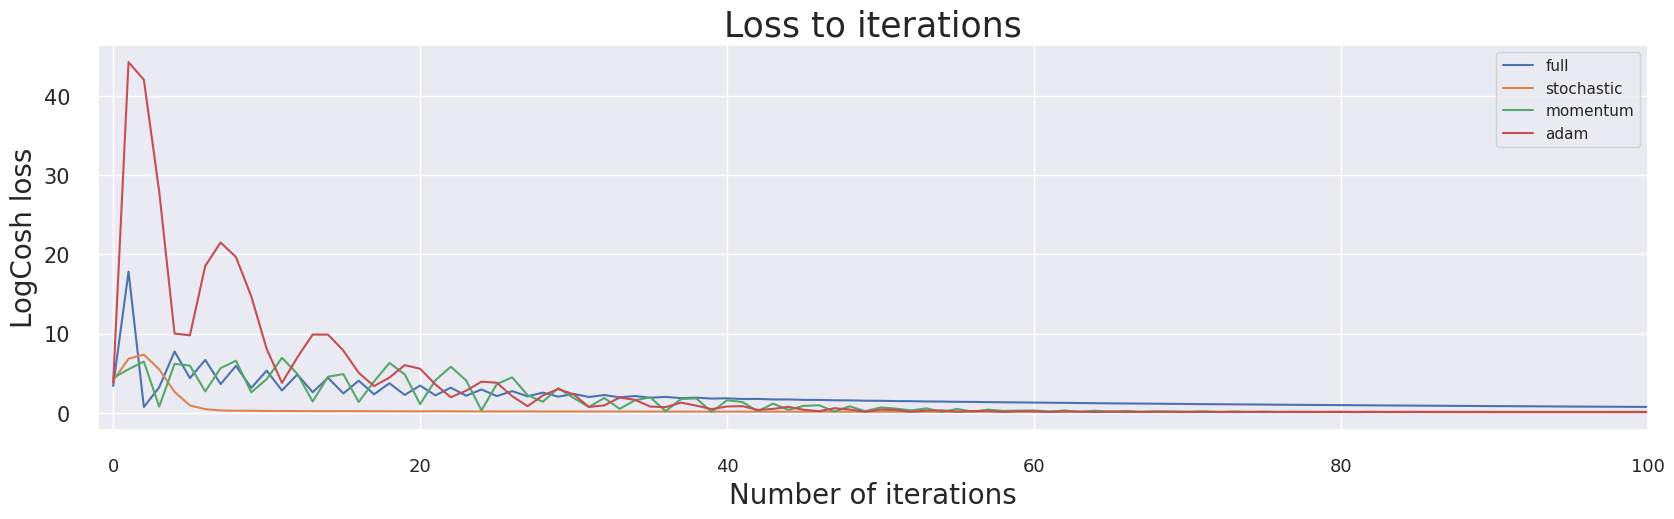

In [26]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
for key in logcosh_loss_hists.keys():
    plt.plot(logcosh_loss_hists[key])

ax.set_title("Loss to iterations", fontsize=25)
ax.set_xlabel("Number of iterations", fontsize=20)
ax.set_ylabel("LogCosh loss", fontsize=20)
ax.tick_params(axis='y',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=15
               )
ax.tick_params(axis='x',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=13
               )
plt.legend(logcosh_loss_hists.keys())
plt.xlim(-1, 100)
plt.show()

**Как и ожидалось, лог-кош лучше MSE реагирует на выбросы, потому что имеет скругление в функции около нуля. В целом улучшились и статистики на выборках.**

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

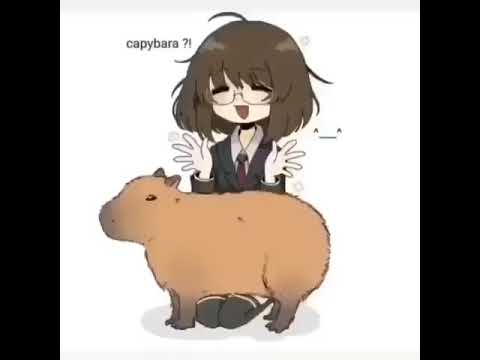

In [34]:
from IPython.display import YouTubeVideo, Image
from IPython import display

YouTubeVideo('qojCsqGO6PI', width=800, height=300)

**Довольные гости:**

<img src=" 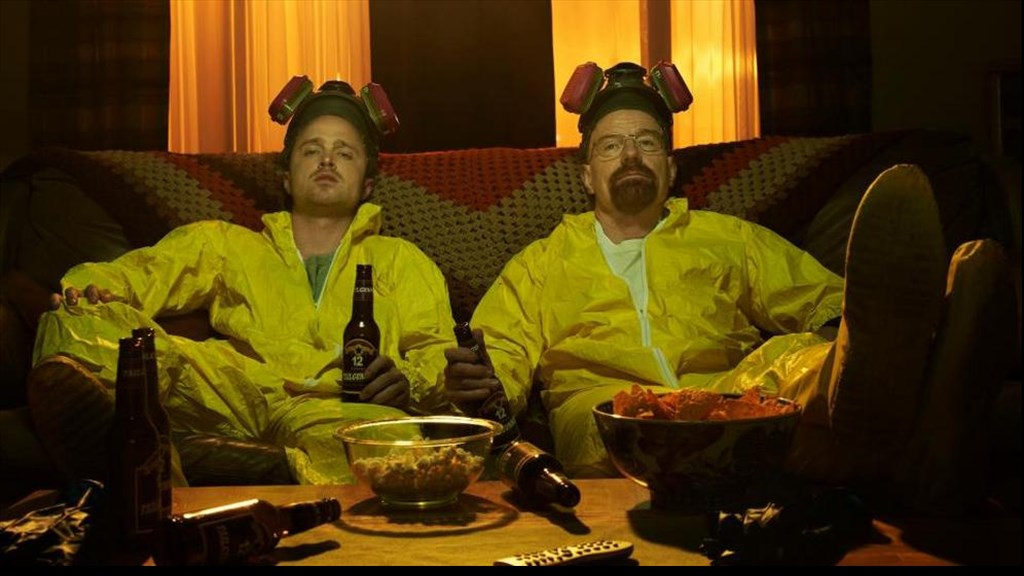" />

**Так как наркотики это плохо, то уберу нар и оставлю довольных котиков.**

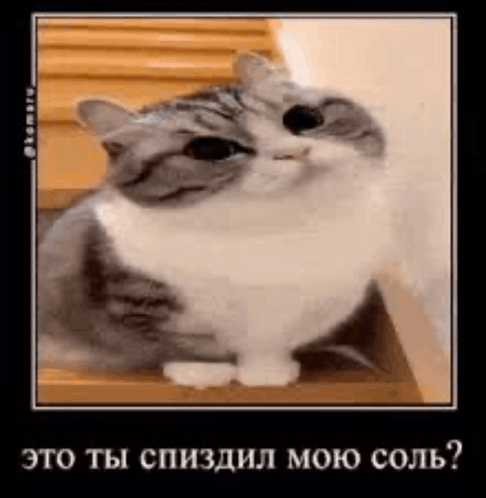

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [27]:
print('Trying adamax')
lambdas = np.logspace(-5, 1, 20)
losses = []

for lambda_ in lambdas:
    descent_config = {
        'descent_name': 'adamax',
        'kwargs': {'dimension': x_val.shape[1],
                  'lambda_': lambda_}
    }

    regression = LinearRegression(
        descent_config=descent_config
    )
    regression.fit(x_train, y_train.to_numpy())

    losses.append(regression.calc_loss(x_val, y_val.to_numpy()))

best_lambdas['adamax'] = lambdas[np.argmin(losses)]
print(f'Best lambda: {best_lambdas["adamax"]:.3f}')
print(f'Loss on validation sample: {np.min(losses):.3f}')

descent_config = {
    'descent_name': 'adamax',
    'kwargs': {'dimension': x_val.shape[1],
              'lambda_': best_lambdas['adamax']}
}
regression = LinearRegression(
    descent_config=descent_config
)
regression.fit(x_train, y_train.to_numpy())

loss_hists['adamax'] = regression.loss_history
print(f'Number of iterations to converge: {len(regression.loss_history) - 1}')
print(f'Loss on train: {regression.calc_loss(x_train, y_train.to_numpy()):.3f}')
print(f'Loss on test:  {regression.calc_loss(x_test, y_test.to_numpy()):.3f}')
print(f'R^2 on train: {r2_score(y_train, regression.predict(x_train)):.3f}')
print(f'R^2 on test:  {r2_score(y_test, regression.predict(x_test)):.3f}\n\n')

Trying adamax
Best lambda: 2.336
Loss on validation sample: 0.234
Number of iterations to converge: 105
Loss on train: 0.235
Loss on test:  0.233
R^2 on train: 0.788
R^2 on test:  0.790




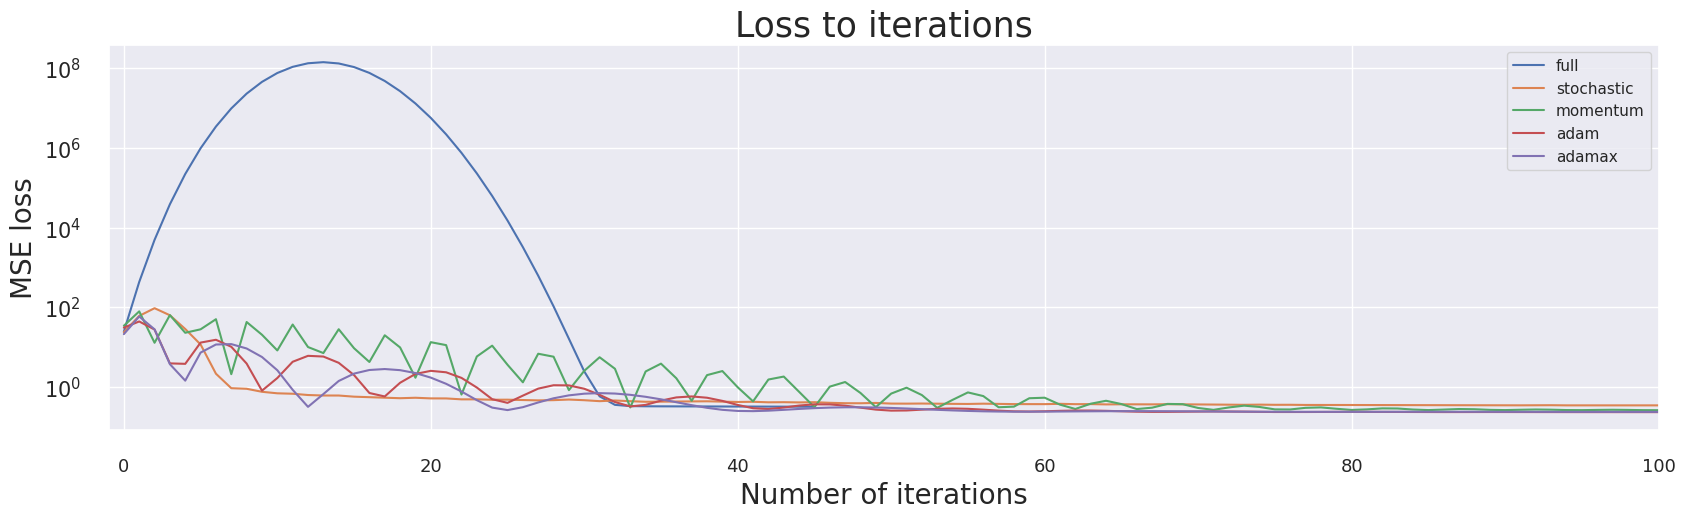

In [28]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
for key in loss_hists.keys():
    plt.plot(loss_hists[key])

ax.set_title("Loss to iterations", fontsize=25)
ax.set_xlabel("Number of iterations", fontsize=20)
ax.set_ylabel("MSE loss", fontsize=20)
ax.tick_params(axis='y',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=15
               )
ax.tick_params(axis='x',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=13
               )
plt.legend(loss_hists.keys())
plt.yscale('log')
plt.xlim(-1, 100)
plt.show()

**Adamax дал в среднем более лучший результат, хотя сам Adam не смог обогнать.**

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

**Для MAE:**
$$
Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} |(x_i, w) - y_i|\\
\dfrac{\partial Q}{\partial w} = \dfrac{1}{\ell}X^Tsign(Xw - y)
$$
**Для Huber:**
$$
L_\delta(y, a)=\left\{\begin{aligned}
        &\frac12 (y - a)^2, \quad |y - a| < \delta \\
        &\delta \left(
            |y - a| - \frac12 \delta
        \right), \quad |y - a| \geq \delta
    \end{aligned}\right.\\
\dfrac{\partial Q}{\partial w} = \dfrac{1}{\ell}X_{<\delta}^T(Xw - y)_{<\delta} + \dfrac{1}{\ell}X_{\geq\delta}^Tsign(Xw - y)_{\geq\delta}
$$
**где за $X_{<\delta}$ обозначены объекты, которые попадают под первое условие, а за $X_{\geq\delta}$ - все остальные.**

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [29]:
loss_hists = {}
best_lambdas = {}
descent_names = ['full', 'stochastic', 'momentum', 'adam', 'adamax']

for descent_name in descent_names:
    print('Trying', descent_name)
    lambdas = np.logspace(-5, 1, 20)
    losses = []

    for lambda_ in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {'dimension': x_val.shape[1],
                       'lambda_': lambda_,
                       'loss_function': LossFunction.MAE}
        }

        regression = LinearRegression(
            descent_config=descent_config
        )
        regression.fit(x_train, y_train.to_numpy())

        losses.append(regression.calc_loss(x_val, y_val.to_numpy()))

    best_lambdas[descent_name] = lambdas[np.argmin(losses)]
    print(f'Best lambda: {best_lambdas[descent_name]:.3f}')
    print(f'Loss on validation sample: {np.min(losses):.3f}')

    descent_config = {
        'descent_name': descent_name,
        'kwargs': {'dimension': x_val.shape[1],
                   'lambda_': best_lambdas[descent_name],
                   'loss_function': LossFunction.MAE}
    }
    regression = LinearRegression(
        descent_config=descent_config
    )
    regression.fit(x_train, y_train.to_numpy())

    loss_hists[descent_name] = regression.loss_history
    print(f'Number of iterations to converge: {len(regression.loss_history) - 1}')
    print(f'Loss on train: {regression.calc_loss(x_train, y_train.to_numpy()):.3f}')
    print(f'Loss on test:  {regression.calc_loss(x_test, y_test.to_numpy()):.3f}')
    print(f'R^2 on train: {r2_score(y_train, regression.predict(x_train)):.3f}')
    print(f'R^2 on test:  {r2_score(y_test, regression.predict(x_test)):.3f}\n\n')

Trying full
Best lambda: 2.336
Loss on validation sample: 0.378
Number of iterations to converge: 93
Loss on train: 0.382
Loss on test:  0.379
R^2 on train: 0.692
R^2 on test:  0.705


Trying stochastic
Best lambda: 0.546
Loss on validation sample: 0.411
Number of iterations to converge: 255
Loss on train: 0.418
Loss on test:  0.419
R^2 on train: 0.713
R^2 on test:  0.718


Trying momentum
Best lambda: 4.833
Loss on validation sample: 0.320
Number of iterations to converge: 218
Loss on train: 0.322
Loss on test:  0.321
R^2 on train: 0.748
R^2 on test:  0.756


Trying adam
Best lambda: 4.833
Loss on validation sample: 0.315
Number of iterations to converge: 300
Loss on train: 0.317
Loss on test:  0.317
R^2 on train: 0.757
R^2 on test:  0.763


Trying adamax
Best lambda: 10.000
Loss on validation sample: 0.315
Number of iterations to converge: 300
Loss on train: 0.317
Loss on test:  0.317
R^2 on train: 0.757
R^2 on test:  0.763




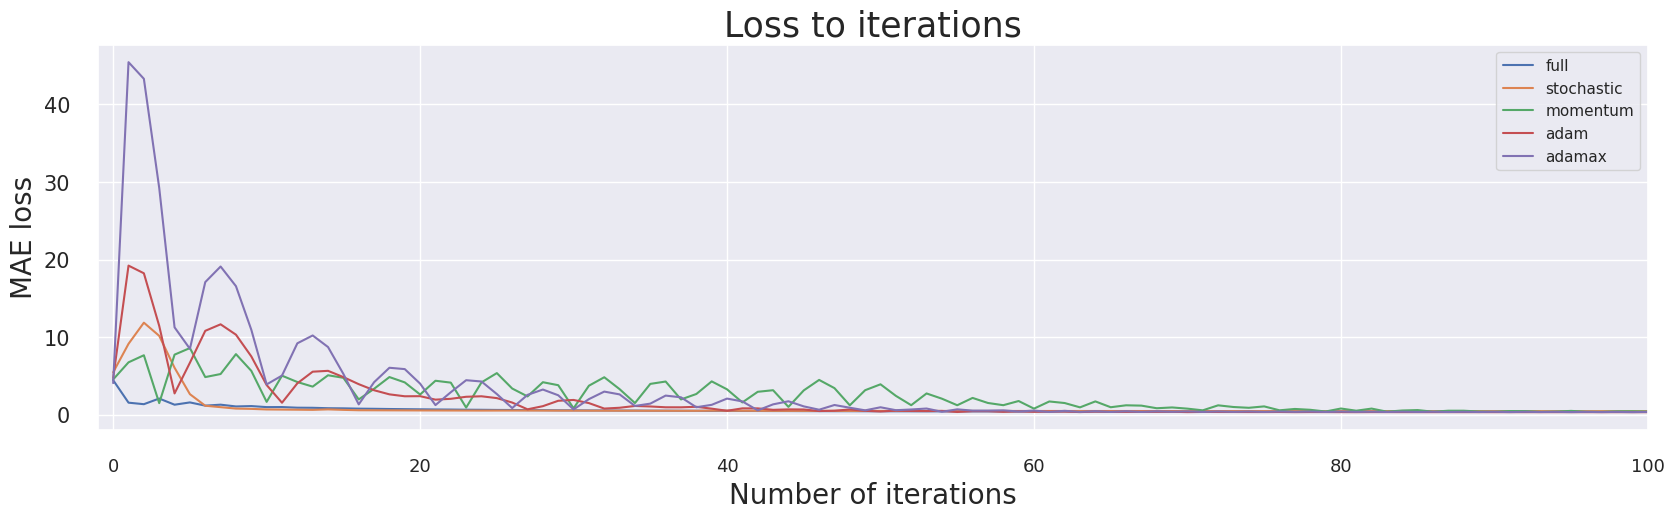

In [30]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
for key in loss_hists.keys():
    plt.plot(loss_hists[key])

ax.set_title("Loss to iterations", fontsize=25)
ax.set_xlabel("Number of iterations", fontsize=20)
ax.set_ylabel("MAE loss", fontsize=20)
ax.tick_params(axis='y',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=15
               )
ax.tick_params(axis='x',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=13
               )
plt.legend(loss_hists.keys())
plt.xlim(-1, 100)
plt.show()

**MAE получился похуже по чем MSE, судя по метрике. Возможно потому что MAE не так реагирует на выбросы, хотя на самом деле эти выбросы хотелось бы учитывать.**

In [31]:
loss_hists = {}
best_lambdas = {}
descent_names = ['full', 'stochastic', 'momentum', 'adam', 'adamax']

for descent_name in descent_names:
    print('Trying', descent_name)
    lambdas = np.logspace(-5, 1, 20)
    losses = []

    for lambda_ in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {'dimension': x_val.shape[1],
                       'lambda_': lambda_,
                       'loss_function': LossFunction.Huber}
        }

        regression = LinearRegression(
            descent_config=descent_config
        )
        regression.fit(x_train, y_train.to_numpy())

        losses.append(regression.calc_loss(x_val, y_val.to_numpy()))

    best_lambdas[descent_name] = lambdas[np.argmin(losses)]
    print(f'Best lambda: {best_lambdas[descent_name]:.3f}')
    print(f'Loss on validation sample: {np.min(losses):.3f}')

    descent_config = {
        'descent_name': descent_name,
        'kwargs': {'dimension': x_val.shape[1],
                   'lambda_': best_lambdas[descent_name],
                   'loss_function': LossFunction.Huber}
    }
    regression = LinearRegression(
        descent_config=descent_config
    )
    regression.fit(x_train, y_train.to_numpy())

    loss_hists[descent_name] = regression.loss_history
    print(f'Number of iterations to converge: {len(regression.loss_history) - 1}')
    print(f'Loss on train: {regression.calc_loss(x_train, y_train.to_numpy()):.3f}')
    print(f'Loss on test:  {regression.calc_loss(x_test, y_test.to_numpy()):.3f}')
    print(f'R^2 on train: {r2_score(y_train, regression.predict(x_train)):.3f}')
    print(f'R^2 on test:  {r2_score(y_test, regression.predict(x_test)):.3f}\n\n')

Trying full
Best lambda: 10.000
Loss on validation sample: 0.119
Number of iterations to converge: 300
Loss on train: 0.122
Loss on test:  0.120
R^2 on train: 0.736
R^2 on test:  0.744


Trying stochastic
Best lambda: 0.546
Loss on validation sample: 0.145
Number of iterations to converge: 208
Loss on train: 0.149
Loss on test:  0.147
R^2 on train: 0.700
R^2 on test:  0.707


Trying momentum
Best lambda: 4.833
Loss on validation sample: 0.105
Number of iterations to converge: 154
Loss on train: 0.105
Loss on test:  0.104
R^2 on train: 0.772
R^2 on test:  0.776


Trying adam
Best lambda: 10.000
Loss on validation sample: 0.100
Number of iterations to converge: 243
Loss on train: 0.101
Loss on test:  0.101
R^2 on train: 0.783
R^2 on test:  0.786


Trying adamax
Best lambda: 10.000
Loss on validation sample: 0.100
Number of iterations to converge: 254
Loss on train: 0.101
Loss on test:  0.101
R^2 on train: 0.783
R^2 on test:  0.786




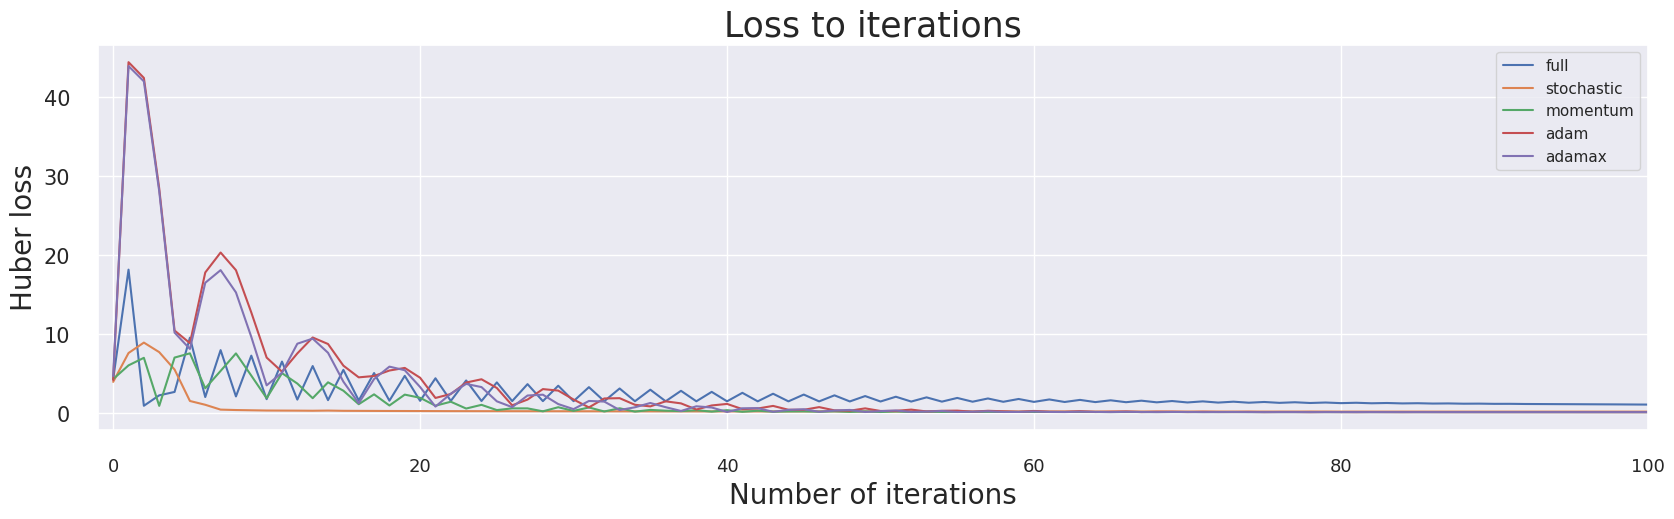

In [32]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
for key in loss_hists.keys():
    plt.plot(loss_hists[key])

ax.set_title("Loss to iterations", fontsize=25)
ax.set_xlabel("Number of iterations", fontsize=20)
ax.set_ylabel("Huber loss", fontsize=20)
ax.tick_params(axis='y',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=15
               )
ax.tick_params(axis='x',
               which='major',
               direction='inout',
               length=10,
               width=1.5,
               pad=15,
               labelsize=13
               )
plt.legend(loss_hists.keys())
plt.xlim(-1, 100)
plt.show()

**Huber loss показал чебя лучше всего (потому что является объединением двух функций), с ним получается самая хорошая метрика.**